# Binary Prediction of Smoker Status using Bio-Signals #

## Импорт библиотек ##

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

## Импорт и анализ данных ##

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [4]:
data.smoking.value_counts(normalize=True)

smoking
0    0.562635
1    0.437365
Name: proportion, dtype: float64

## Обработка пропущенных значений

In [5]:
data.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

Видим, что пропущенных значений нет, значит можем перейти далее.

## Обзор числовых признаков

<Axes: title={'center': 'Сorrelation matrix'}>

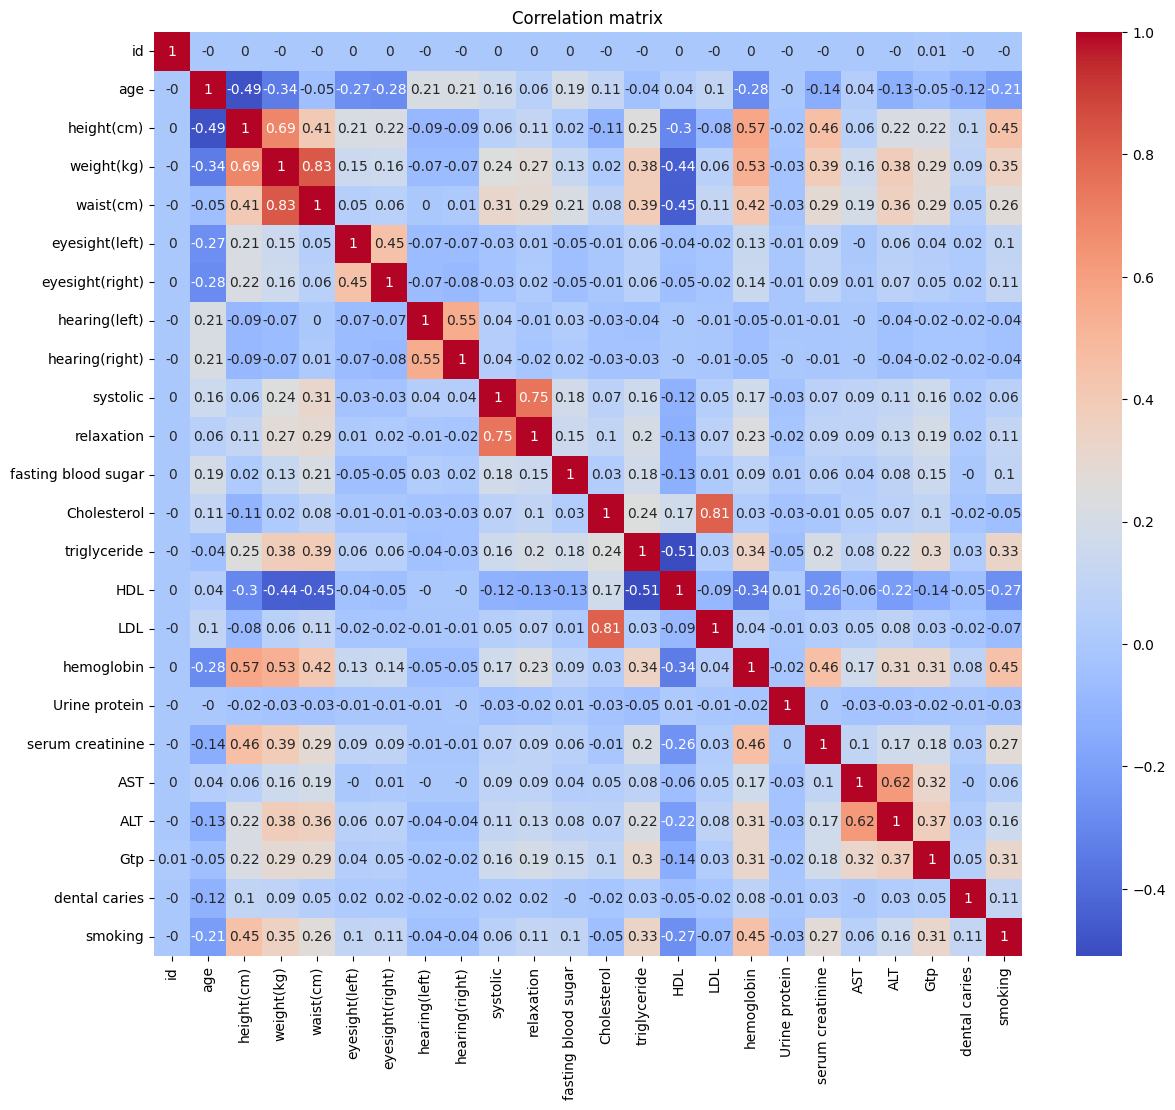

In [7]:
plt.figure(figsize=(14, 12))
plt.title('Сorrelation matrix')
sns.heatmap(data.corr().round(2), annot=True, cmap='coolwarm')

## Подробности о Модели SVM

### Что Такое SVM?

Метод опорных векторов (Support Vector Machine, SVM) — это мощный алгоритм машинного обучения, используемый для задач классификации и регрессии. Основная идея SVM заключается в нахождении гиперплоскости, которая оптимально разделяет данные на классы в пространстве признаков.

### Основные концепции SVM:

- **Гиперплоскость**: В случае линейно разделимых данных, SVM ищет гиперплоскость, которая максимизирует зазор (margin) между классами. Зазор — это расстояние между гиперплоскостью и ближайшими точками данных (опорными векторами).
- **Опорные векторы**: Это точки данных, которые находятся ближе всего к гиперплоскости и определяют её положение. Они являются критическими для определения границы разделения.
- **Ядра (Kernels)**: Для нелинейно разделимых данных SVM использует ядра, которые позволяют преобразовать данные в более высокое измерение, где они становятся линейно разделимыми. Популярные ядра включают линейное, полиномиальное и радиально-базисное (RBF).
- **Регуляризация**: Параметр регуляризации (C) контролирует баланс между максимизацией зазора и минимизацией ошибки классификации. Большое значение C уменьшает ошибку классификации, но может привести к переобучению.

### Преимущества SVM

- **Эффективность**: SVM особенно эффективен в высокоразмерных пространствах.
- **Гибкость**: Возможность использования различных ядер для работы с нелинейными данными.
- **Робастность**: Хорошо работает с небольшими выборками данных.

### Недостатки SVM

- **Выбор Параметров**: Выбор правильного ядра и параметра регуляризации может быть сложной задачей.
- **Вычислительная Сложность**: Обучение модели может быть ресурсоёмким при больших объёмах данных.

### Области применения

SVM широко используется в различных областях, таких как распознавание образов, биоинформатика, текстовая классификация и другие задачи, где требуется высокая точность и надежность.


## Построение модели ##

In [8]:
X_train, X_val, y_train, y_val = train_test_split(data.drop(['id', 'smoking'], axis=1),
                                                  data['smoking'], test_size=0.2, random_state=42)

In [9]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [10]:
y_pred_svm=svm.predict(X_val)

In [17]:
print('Accuracy:',accuracy_score(y_val,y_pred_svm))
print('Precision:', precision_score(y_val,y_pred_svm))
print('Recall:', recall_score(y_val,y_pred_svm))
print('F1-score:', f1_score(y_val,y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(y_val,y_pred_svm))

Accuracy: 0.7577232198920005
Precision: 0.6981037924151696
Recall: 0.7955078541474163
F1-score: 0.7436297797415369
Confusion Matrix:
 [[12943  4840]
 [ 2877 11192]]


## Оценка работы модели

### 1. **Precision**
   - **Значение**: 0.698
   - Метрика precision — это одна из ключевых метрик для оценки качества моделей классификации, особенно в задачах бинарной классификации. Она измеряет, какая доля предсказанных положительных примеров действительно является положительными.

### 2. **Recall**
   - **Значение**: 0.795
   - Recall — это метрика, используемая для оценки качества моделей классификации, особенно в задачах бинарной классификации. Она измеряет, какая доля всех действительно положительных примеров была правильно предсказана моделью.

### 3. **F1-score**
   - **Значение**: 0.743
   - F1-score — это метрика, используемая для оценки качества моделей классификации, особенно в задачах бинарной классификации. Она представляет собой гармоническое среднее между precision (точностью) и recall (полнотой), что позволяет учитывать баланс между этими двумя метриками.

### 4. **Матрица ошибок (confusion matrix)**
   - **Значение**:

|                | Предсказано: Положительный | Предсказано: Отрицательный |
|----------------|----------------------------|----------------------------|
| Истинный: Положительный | 12943                    | 4840                    |
| Истинный: Отрицательный | 2877                     | 11192                    |

   - Матрица ошибок — это таблица, используемая для оценки производительности модели классификации. Она показывает, насколько хорошо модель предсказывает классы, и предоставляет детальную информацию о типах ошибок, которые делает модель.

### 5. **Точность модели (custom Accuracy)**
   - **Значение**: 75.77%
   - Модель правильно предсказывает значения с точностью в 75.77%, что является хорошим результатом для модели классификации.

## Вывод:
Модель показала хорошие результаты с точностью 75.77%.